<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-ML/blob/main/Day_30Function_Transformer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Manish-k723/100-days-of-ML/main/train.csv', usecols = ['Age', 'Fare', 'Survived'])
test_df = pd.read_csv('https://raw.githubusercontent.com/Manish-k723/100-days-of-ML/main/test.csv', usecols = ['Age', 'Fare'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
test_df.isna().sum()

Age     86
Fare     1
dtype: int64

In [ ]:
test_df.isna()

,Age,Fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
413,True,False
414,False,False
415,False,False
416,True,False


In [ ]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [ ]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [ ]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size =0.2, random_state = 42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Age QQ plot')

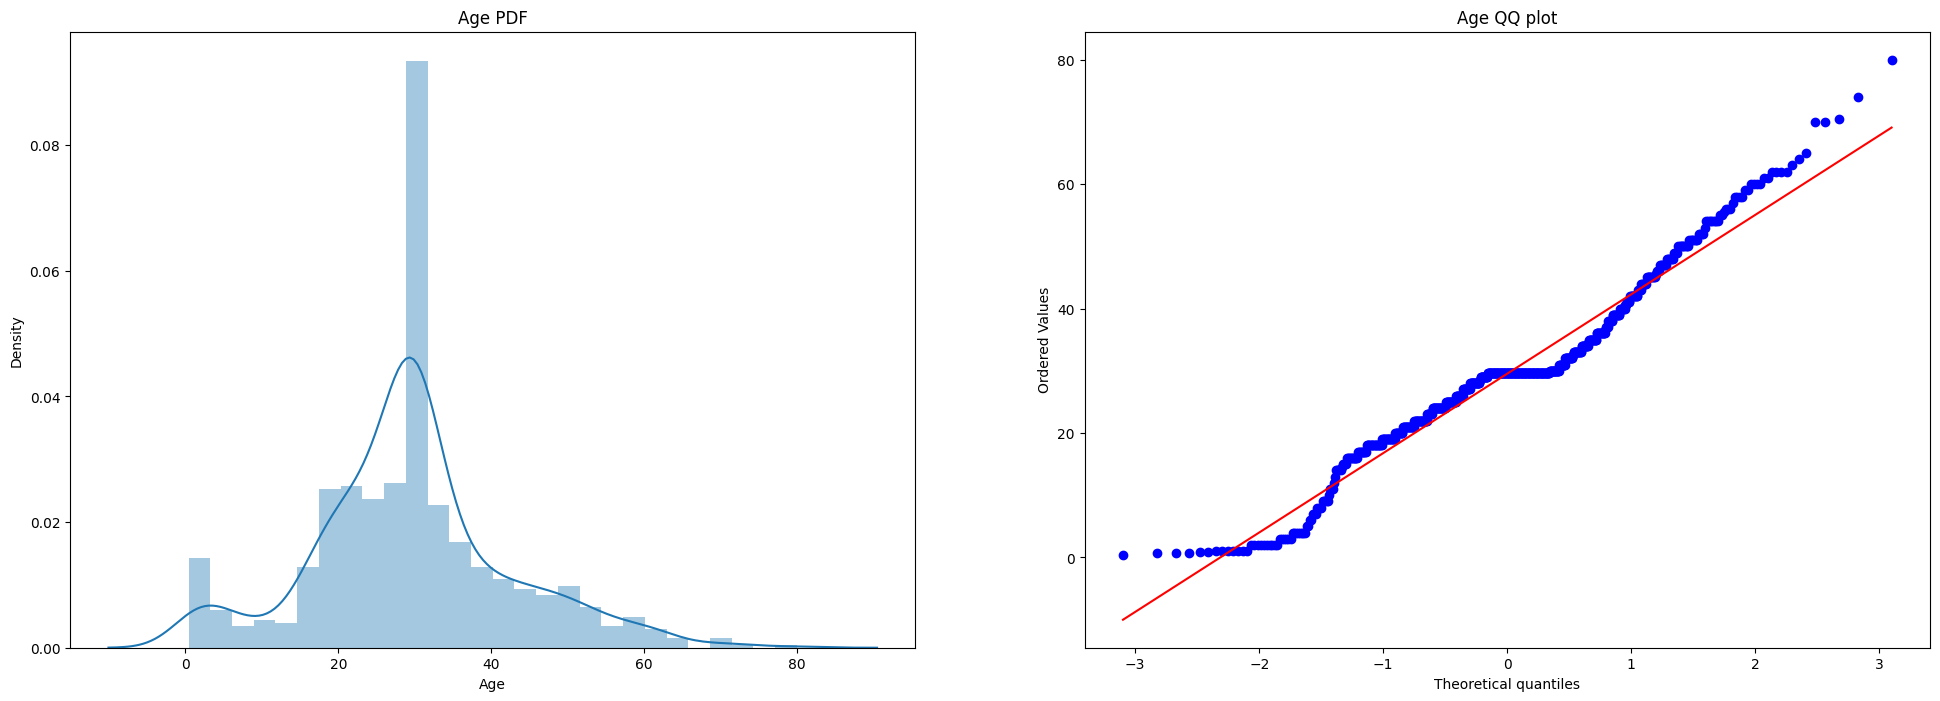

In [ ]:
plt.figure(figsize = (24,8))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
st.probplot(x_train['Age'], dist="norm", plot = plt)
plt.title('Age QQ plot')

# plt.show()

Text(0.5, 1.0, 'Fare QQ plot')

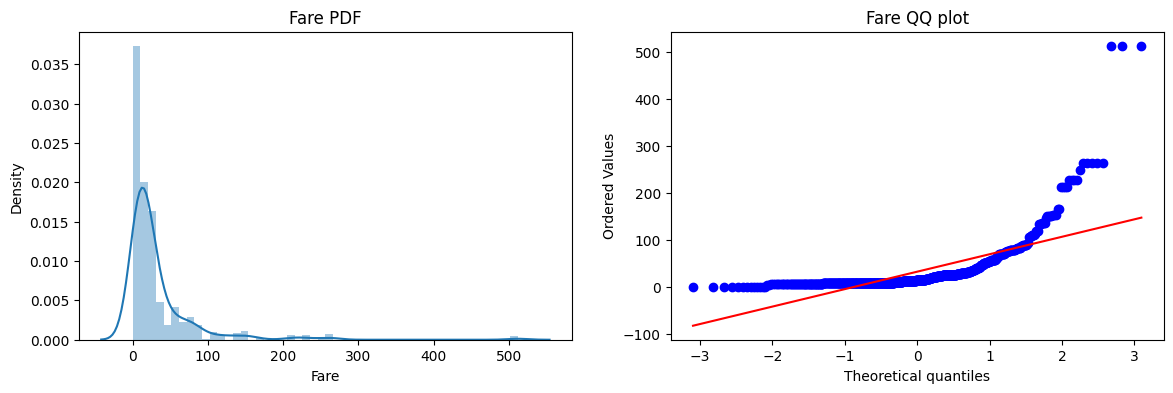

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
st.probplot(x_train['Fare'], dist="norm", plot = plt)
plt.title('Fare QQ plot')

In [ ]:
lr = LogisticRegression()
clf = DecisionTreeClassifier()

lr.fit(x_train,y_train)
clf.fit(x_train, y_train)

lr_pred = lr.predict(x_val)
clf_pred = clf.predict(x_val)

print(accuracy_score(lr_pred, y_val))
print(accuracy_score(clf_pred, y_val))

0.6480446927374302
0.659217877094972


In [ ]:
trf = FunctionTransformer(func = np.log1p)

In [ ]:
x_train_transform = trf.fit_transform(x_train)
x_val_transformed = trf.transform(x_val)

In [ ]:
lr = LogisticRegression()
clf = DecisionTreeClassifier()

lr.fit(x_train_transform,y_train)
clf.fit(x_train_transform, y_train)

lr_pred = lr.predict(x_val_transformed)
clf_pred = clf.predict(x_val_transformed)

print(accuracy_score(lr_pred, y_val))
print(accuracy_score(clf_pred, y_val))

0.6815642458100558
0.6703910614525139


In [ ]:
x_transformed = trf.fit_transform(x)

lr = LogisticRegression()
clf = DecisionTreeClassifier()

print("Logistic Regression {}".format(np.mean(cross_val_score(lr, x_transformed, y, scoring = 'accuracy', cv = 10 ))))
print("Decision Tree {}".format(np.mean(cross_val_score(clf, x_transformed, y, scoring = 'accuracy', cv = 10 ))))

Logistic Regression 0.678027465667915
Decision Tree 0.658876404494382


Text(0.5, 1.0, 'After Log')

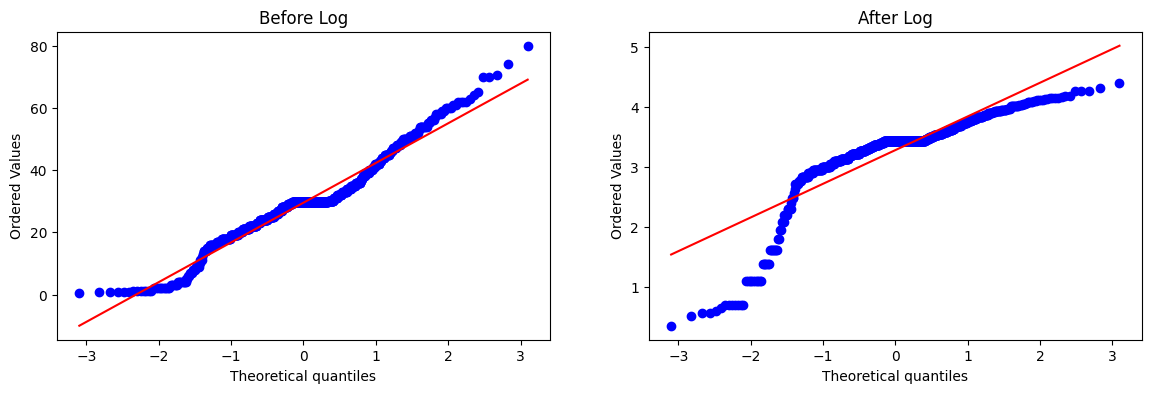

In [ ]:
plt.figure(figsize = (14,4))

plt.subplot(121)
st.probplot(x_train['Age'], plot = plt)
plt.title('Before Log')

plt.subplot(122)
st.probplot(x_train_transform['Age'], plot = plt)
plt.title('After Log')

The log tranformation here caused problem for the age attribute and disturbed its distribution. This can happen some time, so we should check this type of things after transformation.

Text(0.5, 1.0, 'After Log')

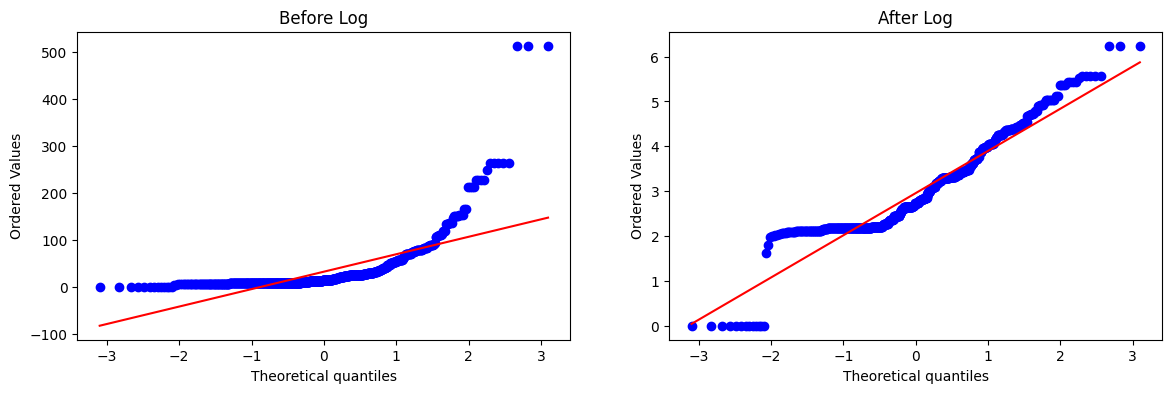

In [ ]:
plt.figure(figsize = (14,4))

plt.subplot(121)
st.probplot(x_train['Fare'], plot = plt)
plt.title('Before Log')

plt.subplot(122)
st.probplot(x_train_transform['Fare'], plot = plt)
plt.title('After Log')

but transformation worked good on log Fare attribute. So, next we only apply transformation to fare and then check the model.

In [ ]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p),['Fare'])], remainder = 'passthrough')

x_train_trans2 = trf2.fit_transform((x_train))
x_val_trans2 = trf2.transform(x_val)

In [ ]:
lr.fit(x_train_trans2, y_train)
clf.fit(x_train_trans2, y_train)

y_pred1 = lr.predict(x_val_trans2)
y_pred2 = clf.predict(x_val_trans2)

print("Logistic Regression {}".format(accuracy_score(y_pred1, y_val)))
print("Decision Tree {}".format(accuracy_score(y_pred2, y_val)))

Logistic Regression 0.6703910614525139
Decision Tree 0.6759776536312849


Small Improvement in Logistic Regression

In [ ]:
x_transformed = trf2.fit_transform(x)

lr = LogisticRegression()
clf = DecisionTreeClassifier()

print("Logistic Regression {}".format(np.mean(cross_val_score(lr, x_transformed, y, scoring = 'accuracy', cv = 10 ))))
print("Decision Tree {}".format(np.mean(cross_val_score(clf, x_transformed, y, scoring = 'accuracy', cv = 10 ))))

Logistic Regression 0.6712609238451936
Decision Tree 0.6577153558052434


One important thing to observe here is, The accuracy of Decision Tree doesnot get effected by any transformation of the data and the reason behind that trees related algorithm generally use comparisions for classification and not see the distibution of the data.


Let's make a function that can be used to for any transformer

In [ ]:
x

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [ ]:
def apply_transform(transform):
  x = df.iloc[:,1:3]
  y = df.iloc[:,0]

  trf = ColumnTransformer([('log', FunctionTransformer(transform),['Fare'])], remainder='passthrough')

  x_trans = trf.fit_transform(x)

  clf = LogisticRegression()

  print("Accuracy ", np.mean(cross_val_score(clf, x_trans,y, scoring = 'accuracy',cv = 10)))

  plt.figure(figsize = (14,4))

  plt.subplot(121)
  st.probplot(x['Fare'], plot = plt)
  plt.title('Before transformation')

  plt.subplot(122)
  st.probplot(x_trans[:,0], plot = plt)
  plt.title('After Transformation')

Accuracy  0.6712609238451936


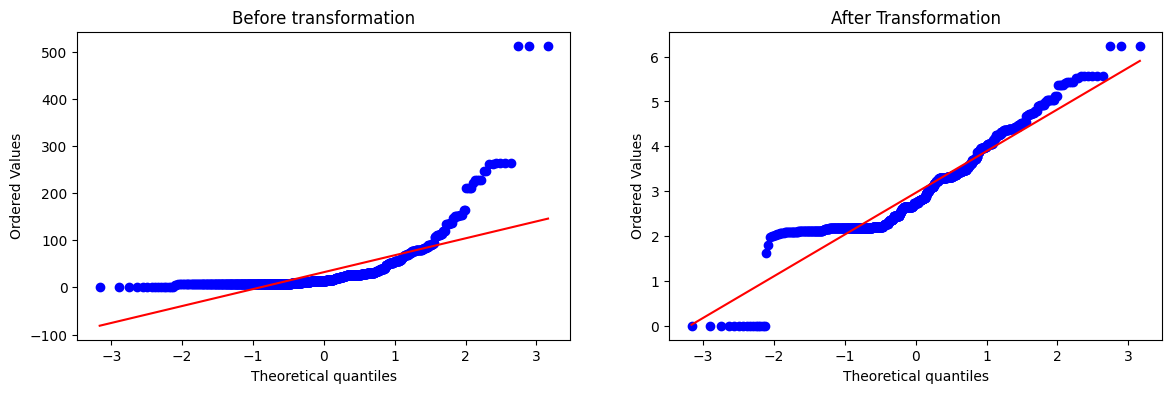

In [ ]:
apply_transform(lambda x: np.log1p(x))

Accuracy  0.6442446941323345


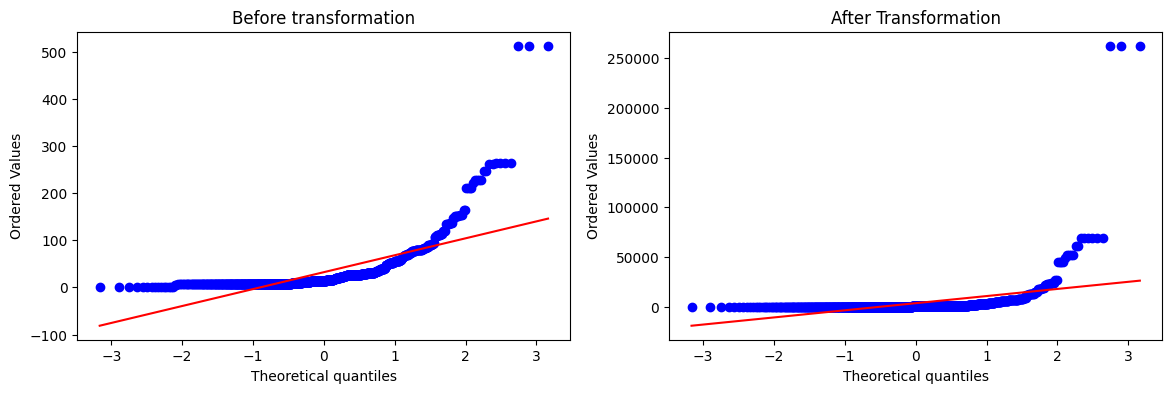

In [ ]:
apply_transform(lambda x: x**2)

Accuracy  0.61729088639201


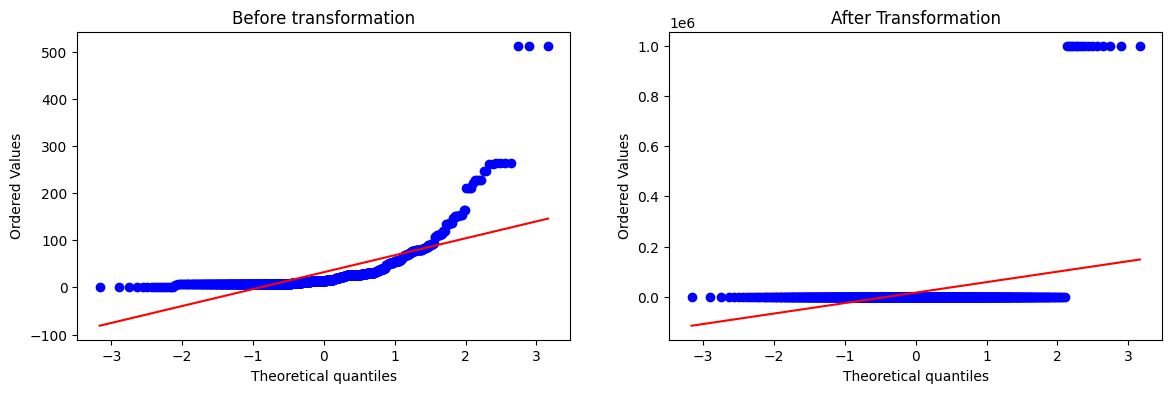

In [ ]:
apply_transform(lambda x: 1/(x+0.000001))

So, we can see the best accuracy we are getting is in Log transformer. The reason could be that our data was left skewed.